In [22]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [23]:
IMAGE_SIZE = [224, 224]

In [41]:
train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

In [42]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [43]:
for layer in vgg.layers:
  layer.trainable = False

In [44]:
folders = glob('Dataset/Train/*')

In [45]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)


In [46]:
model = Model(inputs=vgg.input, outputs=prediction)

In [47]:
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [48]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [49]:
from keras.preprocessing.image import ImageDataGenerator

In [50]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [51]:
test_datagen = ImageDataGenerator(rescale = 1./255)


In [52]:
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [53]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 134 images belonging to 2 classes.


In [54]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-54-89113a27acbd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
13/13 [==============================] - 411s 32s/step - loss: 1.5379 - accuracy: 0.4952 - val_loss: 0.9455 - val_accuracy: 0.6791
Epoch 2/5
13/13 [==============================] - 406s 32s/step - loss: 0.8147 - accuracy: 0.6082 - val_loss: 0.8857 - val_accuracy: 0.5448
Epoch 3/5
13/13 [==============================] - 449s 35s/step - loss: 0.4154 - accuracy: 0.8077 - val_loss: 0.5088 - val_accuracy: 0.7239
Epoch 4/5
13/13 [==============================] - 450s 35s/step - loss: 0.4059 - accuracy: 0.8053 - val_loss: 0.4639 - val_accuracy: 0.7761
Epoch 5/5
13/13 [==============================] - 451s 35s/step - loss: 0.3956 - accuracy: 0.7957 - val_loss: 0.6608 - val_accuracy: 0.6418


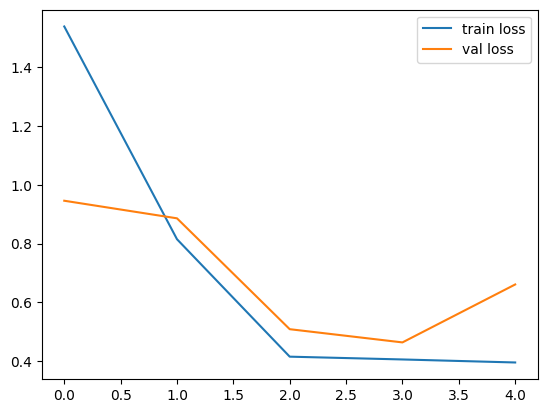

<Figure size 640x480 with 0 Axes>

In [55]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


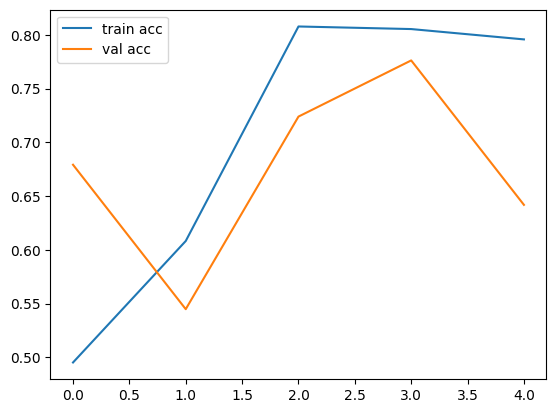

<Figure size 640x480 with 0 Axes>

In [57]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [58]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg19.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
